In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import psycopg2 # needed to get database exception errors when uploading dataframe
import requests # package for getting data from the web
from scipy.stats import ttest_ind # statical test ttest and p test
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chi2_contingency




In [135]:
heart = pd.read_csv("data/heart_attack.csv")
heart.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [136]:
heart

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [137]:
heart.columns = heart.columns.str.lower().str.replace(' ','_')


In [138]:
wlb = pd.read_csv("data/work_life_balance.csv")
wlb.head()

,2022,2021,City,Country,Remote Jobs,Overworked Population,Minimum Vacations Offered (Days),Vacations Taken (Days),Unemployment,Multiple Jobholders,...,Healthcare,Access to Mental Healthcare,Inclusivity & Tolerance,Affordability,"Happiness, Culture & Leisure",City Safety,Outdoor Spaces,Air Quality,Wellness and Fitness,TOTAL SCORE
0,1,2,Oslo,Norway,41.72%,11.20%,25,25,94.7,9.10%,...,100.0,85.0,93.2,59.4,88.8,86.5,95.6,97.5,65.7,100.00
1,2,-,Bern,Switzerland,44.86%,11.40%,20,25,99.8,7.60%,...,99.6,78.6,94.6,69.9,100.0,91.8,87.1,100.0,69.1,99.46
2,3,1,Helsinki,Finland,38.92%,12.70%,25,30,89.3,6.30%,...,96.7,73.0,93.9,65.0,96.3,94.9,86.0,97.0,68.3,99.24
3,4,3,Zurich,Switzerland,44.86%,11.90%,20,25,99.2,7.60%,...,99.2,78.6,87.5,71.6,91.5,92.8,84.0,96.2,68.7,96.33
4,5,5,Copenhagen,Denmark,41.42%,10.50%,25,28,94.8,7.60%,...,94.8,77.6,95.2,65.3,92.5,95.7,75.5,95.1,66.3,96.21


In [139]:
wlb.columns = wlb.columns.str.lower().str.replace(' ','_')

In [140]:
df_heart_wlb = heart.merge(wlb, how = 'right', on = 'country')

In [141]:
df_heart_wlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_id                        11751 non-null  object 
 1   age                               11751 non-null  float64
 2   sex                               11751 non-null  object 
 3   cholesterol                       11751 non-null  float64
 4   blood_pressure                    11751 non-null  object 
 5   heart_rate                        11751 non-null  float64
 6   diabetes                          11751 non-null  float64
 7   family_history                    11751 non-null  float64
 8   smoking                           11751 non-null  float64
 9   obesity                           11751 non-null  float64
 10  alcohol_consumption               11751 non-null  float64
 11  exercise_hours_per_week           11751 non-null  float64
 12  diet

In [142]:
df_heart_wlb.isnull().sum()

patient_id                          74
age                                 74
sex                                 74
cholesterol                         74
blood_pressure                      74
heart_rate                          74
diabetes                            74
family_history                      74
smoking                             74
obesity                             74
alcohol_consumption                 74
exercise_hours_per_week             74
diet                                74
previous_heart_problems             74
medication_use                      74
stress_level                        74
sedentary_hours_per_day             74
income                              74
bmi                                 74
triglycerides                       74
physical_activity_days_per_week     74
sleep_hours_per_day                 74
country                              0
continent                           74
hemisphere                          74
heart_attack_risk        

In [143]:
#df_dropped_a = df.dropna(subset=['A'])
#dropping null values from columns

df_cleaned_heart_wlb =df_heart_wlb.dropna(subset=['patient_id','sex','age','cholesterol','blood_pressure','heart_rate','diabetes','family_history',
                                                 'smoking','obesity','alcohol_consumption','exercise_hours_per_week','diet','previous_heart_problems',
                                                  'medication_use','stress_level','sedentary_hours_per_day','income','bmi','triglycerides',
                                                   'physical_activity_days_per_week','sleep_hours_per_day','continent','hemisphere','heart_attack_risk'])                                 

In [144]:
#change float into int

df_cleaned_heart_wlb['triglycerides'] = df_cleaned_heart_wlb['triglycerides'].astype(int)


/var/folders/n8/dys0g7xj7cv3k9q6t695fbrh0000gn/T/ipykernel_48276/740134893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_heart_wlb['triglycerides'] = df_cleaned_heart_wlb['triglycerides'].astype(int)


In [145]:
df_heart_wlb_final =df_cleaned_heart_wlb.drop(['patient_id','2022', '2021','city'],axis=1)

In [146]:
#converting percentage into float

df_heart_wlb_final['inflation'] = df_heart_wlb_final['inflation'].str.replace('%', '').astype(float)


In [147]:
df_heart_wlb_final['multiple_jobholders'] = df_heart_wlb_final['multiple_jobholders'].str.replace('%', '').astype(float)

In [148]:
df_heart_wlb_final['remote_jobs'] = df_heart_wlb_final['remote_jobs'].str.replace('%', '').astype(float)

In [149]:
df_heart_wlb_final['overworked_population'] = df_heart_wlb_final['overworked_population'].str.replace('%', '').astype(float)

In [150]:
#change float into int

df_heart_wlb_final['inflation'] = df_heart_wlb_final['inflation'].astype(int)
df_heart_wlb_final['multiple_jobholders'] = df_heart_wlb_final['multiple_jobholders'].astype(int)
df_heart_wlb_final['remote_jobs'] = df_heart_wlb_final['remote_jobs'].astype(int)
df_heart_wlb_final['overworked_population'] = df_heart_wlb_final['overworked_population'].astype(int)

In [151]:
#replace '-' with nan 
df_heart_wlb_final['vacations_taken_(days)'] = df_heart_wlb_final['vacations_taken_(days)'].replace('-', np.nan)

In [152]:
#converting into float

df_heart_wlb_final['vacations_taken_(days)'] = df_heart_wlb_final['vacations_taken_(days)'].astype(float)

In [153]:
#repalacing nan the mean value

df_heart_wlb_final['vacations_taken_(days)'].fillna(df_heart_wlb_final['vacations_taken_(days)'].mean(), inplace=True)


In [154]:
#converting float into int

df_heart_wlb_final['vacations_taken_(days)'] = df_heart_wlb_final['vacations_taken_(days)'].astype(int)

checking p value

In [155]:
# Split data into two groups
obesity_1 = df_heart_wlb_final[df_heart_wlb_final['obesity'] == 1]['heart_attack_risk']
obesity_0 = df_heart_wlb_final[df_heart_wlb_final['obesity'] == 0]['heart_attack_risk']

# Perform t-test
t_stat, p_value = ttest_ind(obesity_1, obesity_0)

# Print results
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


T-statistic: -2.2405181627749093
P-value: 0.025075915330885903
Reject the null hypothesis. There is a significant difference between the groups.


In [156]:
# Split data into two groups
family_1 = df_heart_wlb_final[df_heart_wlb_final['family_history'] == 1]['heart_attack_risk']
family_0 = df_heart_wlb_final[df_heart_wlb_final['family_history'] == 0]['heart_attack_risk']

# Perform t-test
t_stat, p_value = ttest_ind(family_1, family_0)

# Print results
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


T-statistic: -1.208741729608221
P-value: 0.226786409799136
Fail to reject the null hypothesis. There is no significant difference between the groups.


In [157]:
# Split data into two groups
diabetes_1 = df_heart_wlb_final[df_heart_wlb_final['diabetes'] == 1]['heart_attack_risk']
diabetes_0 = df_heart_wlb_final[df_heart_wlb_final['diabetes'] == 0]['heart_attack_risk']

# Perform t-test
t_stat, p_value = ttest_ind(diabetes_1, diabetes_0)

# Print results
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


T-statistic: 2.8418331475547243
P-value: 0.004493220531283819
Reject the null hypothesis. There is a significant difference between the groups.


In [158]:
# Split data into two groups
alcohol_1 = df_heart_wlb_final[df_heart_wlb_final['alcohol_consumption'] == 1]['heart_attack_risk']
alcohol_0 = df_heart_wlb_final[df_heart_wlb_final['alcohol_consumption'] == 0]['heart_attack_risk']

# Perform t-test
t_stat, p_value = ttest_ind(alcohol_1, alcohol_0)

# Print results
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


T-statistic: -2.0104331893141745
P-value: 0.04440816949010908
Reject the null hypothesis. There is a significant difference between the groups.


In [159]:
# Split data into two groups
heart_1 = df_heart_wlb_final[df_heart_wlb_final['heart_attack_risk'] == 1]['inflation']
heart_0 = df_heart_wlb_final[df_heart_wlb_final['heart_attack_risk'] == 0]['inflation']

# Perform t-test
t_stat, p_value = ttest_ind(heart_1, heart_0)

# Print results
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


T-statistic: 0.47183730442329375
P-value: 0.6370516838510216
Fail to reject the null hypothesis. There is no significant difference between the groups.


In [160]:
df_heart_wlb_final.drop(columns=[
                            'blood_pressure','continent','hemisphere'],axis=1,inplace=True)

Analyze the Data
Perform statistical analysis to examine the relationship between country and heart attack incidence. We can use chi-square test for independence as it is suitable for categorical data.



hypo:1 country_heart_heart_attack

In [161]:


# Create a contingency table
contingency_table = pd.crosstab(df_heart_wlb_final['country'], df_heart_wlb_final['heart_attack_risk'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 10.897138901667436
P-value: 0.5377539102259956


In [162]:
# Calculate the percentage of heart attacks for each country
country_heart_attack = df_heart_wlb_final.groupby('country')['heart_attack_risk'].mean().reset_index()
country_heart_attack['Heart_Attack_Percentage'] = country_heart_attack['heart_attack_risk'] * 100


In [163]:
# Calculate the overall average heart attack percentage
overall_average = country_heart_attack['Heart_Attack_Percentage'].mean()

print(country_heart_attack)
print(f"Overall Average Heart Attack Percentage: {overall_average}")

         country  heart_attack_risk  Heart_Attack_Percentage
0      Argentina           0.369427                36.942675
1      Australia           0.374165                37.416481
2         Brazil           0.352814                35.281385
3         Canada           0.359091                35.909091
4         France           0.352018                35.201794
5        Germany           0.360587                36.058700
6          Italy           0.315545                31.554524
7          Japan           0.332564                33.256351
8    New Zealand           0.347126                34.712644
9   South Africa           0.338824                33.882353
10   South Korea           0.398533                39.853301
11         Spain           0.348837                34.883721
12      Thailand           0.376168                37.616822
Overall Average Heart Attack Percentage: 35.582295574196436


In [164]:
country_heart_attack['difference'] = country_heart_attack['Heart_Attack_Percentage'] - 35.582295574196436

In [165]:
country_heart_attack['difference'].round(2)

0     1.36
1     1.83
2    -0.30
3     0.33
4    -0.38
5     0.48
6    -4.03
7    -2.33
8    -0.87
9    -1.70
10    4.27
11   -0.70
12    2.03
Name: difference, dtype: float64

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


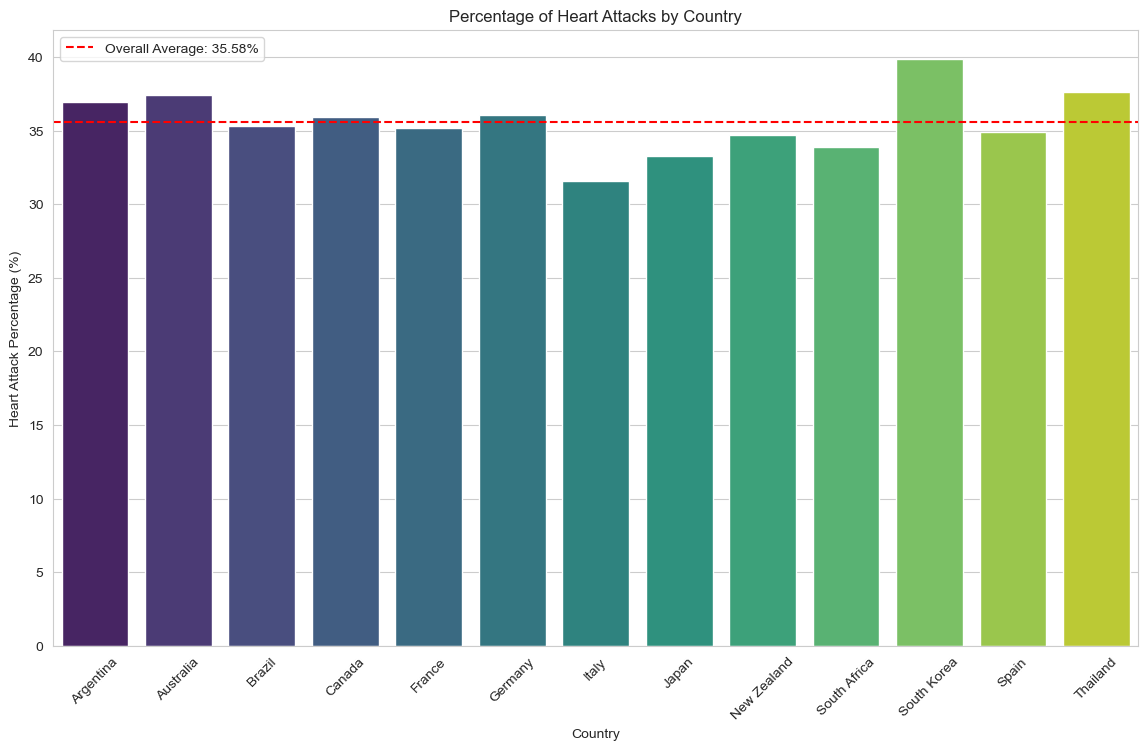

In [190]:
# Set the plot size and style
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create the bar plot
sns.barplot(x='country', y='Heart_Attack_Percentage', data=country_heart_attack, palette='viridis')

# Add the overall average line
plt.axhline(overall_average, color='red', linestyle='--', label=f'Overall Average: {overall_average:.2f}%')

# Add annotations for the percentages
#for index, row in country_heart_attack.iterrows():
 #   plt.text(index, row['Heart_Attack_Percentage'] + 0.5, f"{row['Heart_Attack_Percentage']:.2f}%", color='black', ha="center")

# Customize the plot
plt.title('Percentage of Heart Attacks by Country')
plt.xlabel('Country')
plt.ylabel('Heart Attack Percentage (%)')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()

hypo:2 debetics_heart_attack

In [167]:
# Create a contingency table
contingency_table = pd.crosstab(df_heart_wlb_final['diabetes'], df_heart_wlb_final['heart_attack_risk'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 7.957300587551184
P-value: 0.004789379152843826


In [168]:
# Calculate the percentage of heart attacks and diabetes for each country
country_stats = df_heart_wlb_final.groupby('country').agg(
    heart_attack_percentage=('heart_attack_risk', 'mean'),
    diabetes_percentage=('diabetes', 'mean')
).reset_index()

# Convert proportions to percentages
country_stats['heart_attack_percentage'] *= 100
country_stats['diabetes_percentage'] *= 100

# Calculate the overall averages
overall_avg_heart_attack = df_heart_wlb_final['heart_attack_risk'].mean() * 100
overall_avg_diabetes = df_heart_wlb_final['diabetes'].mean() * 100

print(country_stats)
print(f"Overall Average Heart Attack Percentage: {overall_avg_heart_attack}")
print(f"Overall Average Diabetes Percentage: {overall_avg_diabetes}")

         country  heart_attack_percentage  diabetes_percentage
0      Argentina                36.942675            66.029724
1      Australia                37.416481            64.810690
2         Brazil                35.281385            61.471861
3         Canada                35.909091            66.136364
4         France                35.201794            66.591928
5        Germany                36.058700            64.570231
6          Italy                31.554524            68.213457
7          Japan                33.256351            68.591224
8    New Zealand                34.712644            61.839080
9   South Africa                33.882353            67.764706
10   South Korea                39.853301            66.259169
11         Spain                34.883721            67.441860
12      Thailand                37.616822            65.887850
Overall Average Heart Attack Percentage: 35.818228235894814
Overall Average Diabetes Percentage: 65.44974895753552


In [193]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

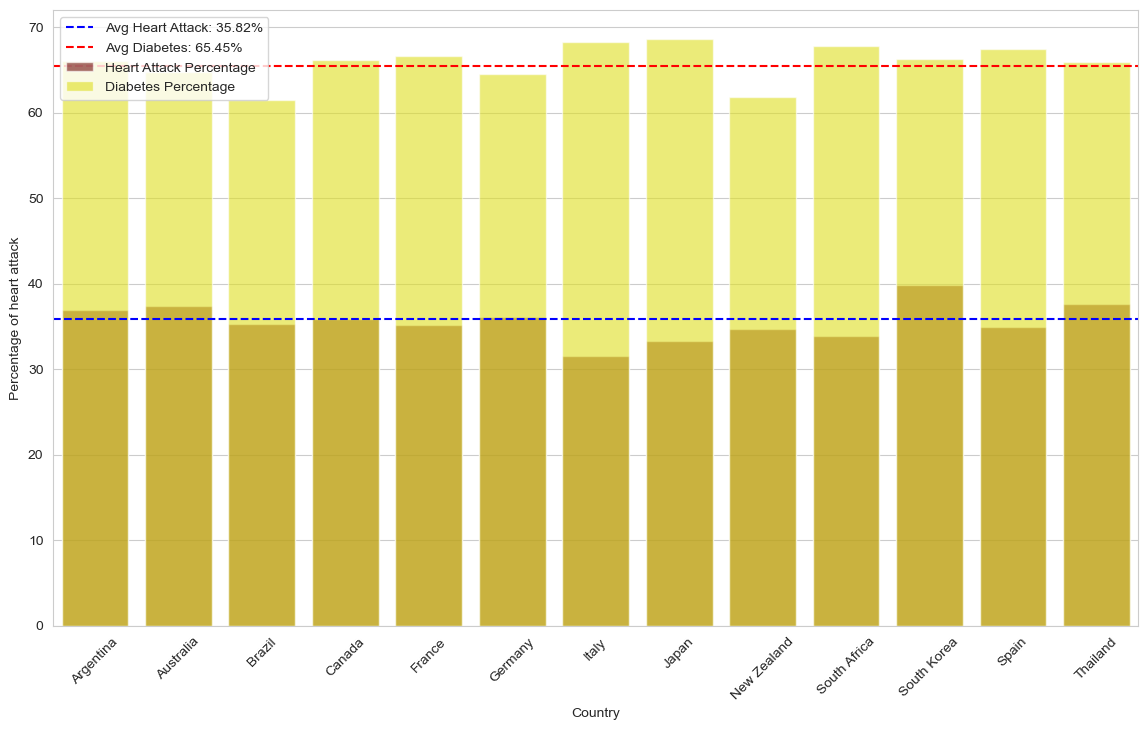

In [212]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Bar plot for Heart Attack Percentage by Country
sns.barplot(x='country', y='heart_attack_percentage', data=country_stats,color='maroon', alpha=0.6, label='Heart Attack Percentage')
plt.axhline(overall_avg_heart_attack, color='blue', linestyle='--', label=f'Avg Heart Attack: {overall_avg_heart_attack:.2f}%')

# Bar plot for Diabetes Percentage by Country
sns.barplot(x='country', y='diabetes_percentage', data=country_stats, alpha=0.6,color='yellow', label='Diabetes Percentage')
plt.axhline(overall_avg_diabetes, color='red', linestyle='--', label=f'Avg Diabetes: {overall_avg_diabetes:.2f}%')

# Customizing the plot
#plt.title('getting heart_attac due to diabetes')
plt.xlabel('Country')
plt.ylabel('Percentage of heart attack')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [170]:
mean_heart_attack = df_heart_wlb_final.groupby('diabetes')['heart_attack_risk'].mean().reset_index()
print(mean_heart_attack)

   diabetes  heart_attack_risk
0       0.0           0.340887
1       1.0           0.367312


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

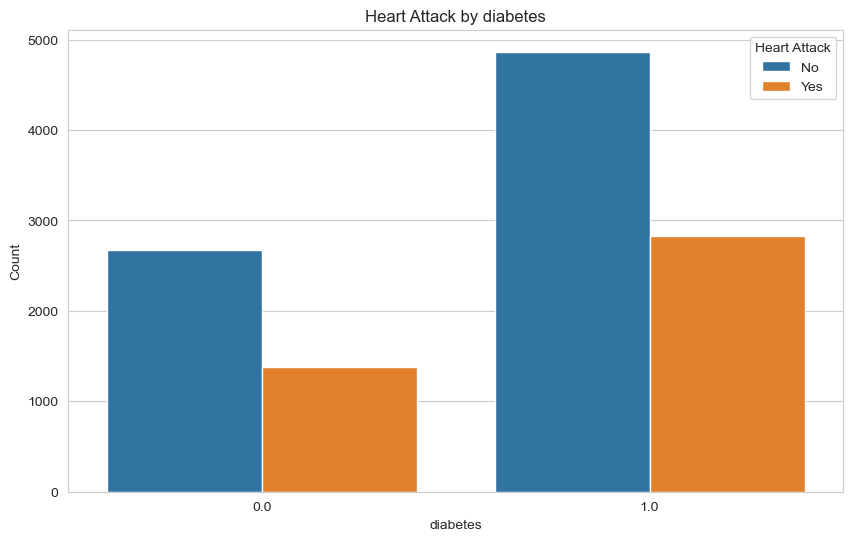

In [171]:
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetes', hue='heart_attack_risk', data=df_heart_wlb_final)
plt.title('Heart Attack by diabetes')
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.legend(title='Heart Attack', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [172]:
# Calculate the count and percentage of heart attacks and diabetes for each country
country_stats = df_heart_wlb_final.groupby('country').agg(
    heart_attack_count=('heart_attack_risk', 'sum'),
    total_count=('country', 'count'),
    diabetes_count=('diabetes', 'sum')
).reset_index()

# Calculate percentages
country_stats['heart_attack_percentage'] = (country_stats['heart_attack_count'] / country_stats['total_count']) * 100
country_stats['diabetes_percentage'] = (country_stats['diabetes_count'] / country_stats['total_count']) * 100

# Display the statistics
print(country_stats)

         country  heart_attack_count  total_count  diabetes_count  \
0      Argentina               174.0          471           311.0   
1      Australia               336.0          898           582.0   
2         Brazil               163.0          462           284.0   
3         Canada               632.0         1760          1164.0   
4         France               157.0          446           297.0   
5        Germany              1548.0         4293          2772.0   
6          Italy               136.0          431           294.0   
7          Japan               144.0          433           297.0   
8    New Zealand               151.0          435           269.0   
9   South Africa               144.0          425           288.0   
10   South Korea               163.0          409           271.0   
11         Spain               300.0          860           580.0   
12      Thailand               161.0          428           282.0   

    heart_attack_percentage  diab

/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

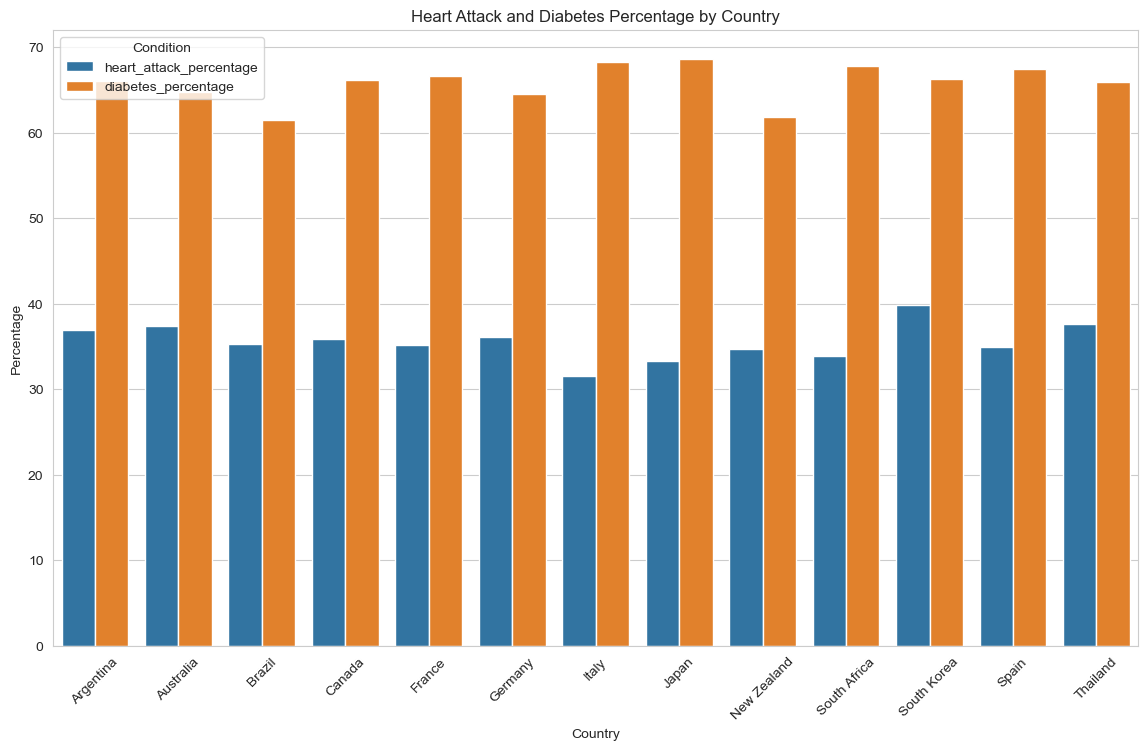

In [173]:
# Melt the dataframe to long format for seaborn
country_stats_melted = country_stats.melt(id_vars='country', 
                                          value_vars=['heart_attack_percentage', 'diabetes_percentage'],
                                          var_name='Condition', value_name='Percentage')

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Bar plot for Heart Attack and Diabetes Percentage by Country
sns.barplot(x='country', y='Percentage', hue='Condition', data=country_stats_melted)

# Customizing the plot
plt.title('Heart Attack and Diabetes Percentage by Country')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Condition')
plt.show()

In [174]:
df_heart_wlb_final

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,...,healthcare,access_to_mental_healthcare,inclusivity_&_tolerance,affordability,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score
6,21.0,Male,389.0,98.0,1.0,1.0,1.0,1.0,1.0,1.813242,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
7,84.0,Male,383.0,73.0,1.0,1.0,1.0,0.0,1.0,9.828130,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
8,90.0,Male,358.0,84.0,0.0,0.0,1.0,0.0,1.0,4.098177,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
9,60.0,Male,145.0,71.0,1.0,0.0,1.0,0.0,1.0,1.892559,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
10,66.0,Male,340.0,69.0,1.0,0.0,1.0,1.0,0.0,9.105434,...,96.7,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11820,26.0,Male,259.0,107.0,0.0,0.0,1.0,0.0,0.0,15.486622,...,50.0,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00
11821,74.0,Female,306.0,84.0,0.0,0.0,1.0,1.0,0.0,14.479625,...,50.0,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00
11822,59.0,Male,148.0,108.0,1.0,1.0,1.0,0.0,1.0,11.987307,...,50.0,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00
11823,80.0,Male,144.0,57.0,1.0,1.0,1.0,0.0,1.0,18.220469,...,50.0,65.0,89.7,71.6,59.6,1.0,87.6,94.5,50.0,50.00


In [175]:
df_heart_wlb_final.columns

Index(['age', 'sex', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week',
       'diet', 'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day', 'country',
       'heart_attack_risk', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score'],
      dtype='object')

In [176]:
# Import the get_engine function from our sql_functions.
from sql_functions import get_engine #adjust this as necessary to match your sql_functions.py connection methods

In [177]:
schema = 'cgn_analytics_24_2' # UPDATE 'TABLE_SCHEMA' based on schema used in class 
engine = get_engine() # assign engine to be able to query against the database



In [178]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
# Example: flights_sp for Sina's flights table, flights_groupname or similar
table_name = 'df_heart_wlb_final'
# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This may take some time ...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        df_heart_wlb_final.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The df_heart_wlb_final table was imported successfully.


age_heart_attack

In [199]:
# Define age groups
bins = [18, 30, 45, 60, 75, 100]
labels = ['18-30', '31-45', '46-60', '61-75', '76+']
df_heart_wlb_final['age_group'] = pd.cut(df_heart_wlb_final['age'], bins=bins, labels=labels, right=False)


In [200]:
# Aggregate the number of heart attacks by country and age group
heart_attack_counts = df_heart_wlb_final[df_heart_wlb_final['heart_attack_risk'] == 1].groupby(['country', 'age_group']).size().reset_index(name='Heart_Attack_Count')
print(heart_attack_counts)

/var/folders/n8/dys0g7xj7cv3k9q6t695fbrh0000gn/T/ipykernel_48276/3824669125.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_attack_counts = df_heart_wlb_final[df_heart_wlb_final['heart_attack_risk'] == 1].groupby(['country', 'age_group']).size().reset_index(name='Heart_Attack_Count')


      country age_group  Heart_Attack_Count
0   Argentina     18-30                  28
1   Argentina     31-45                  42
2   Argentina     46-60                  32
3   Argentina     61-75                  28
4   Argentina       76+                  44
..        ...       ...                 ...
60   Thailand     18-30                  28
61   Thailand     31-45                  33
62   Thailand     46-60                  31
63   Thailand     61-75                  31
64   Thailand       76+                  38

[65 rows x 3 columns]


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql

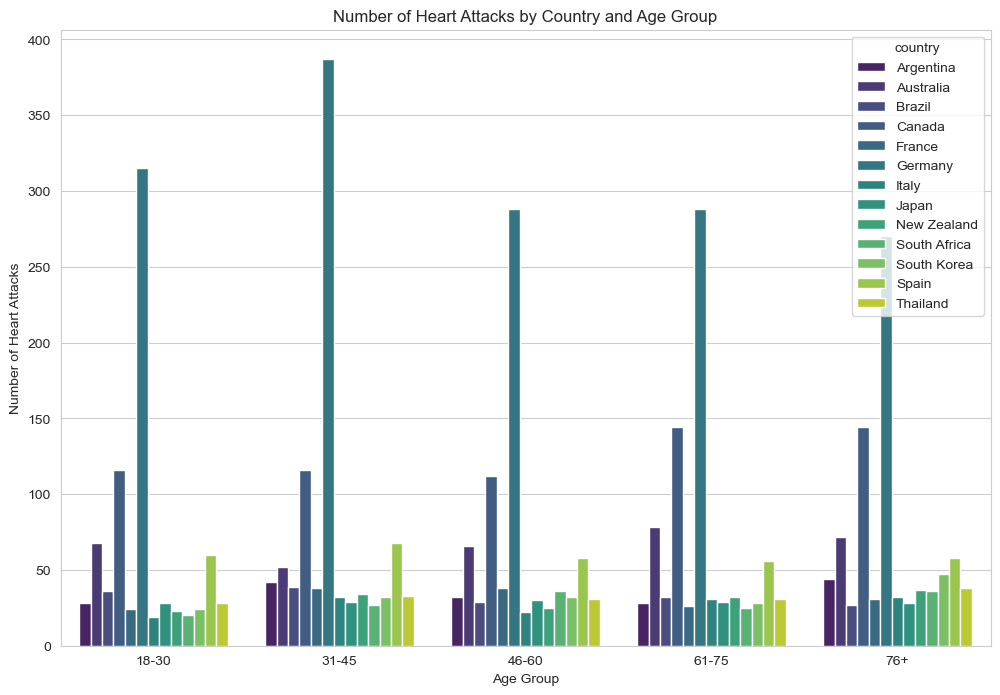

In [201]:
# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='age_group', y='Heart_Attack_Count', hue='country', data=heart_attack_counts, palette='viridis')

plt.xlabel('Age Group')
plt.ylabel('Number of Heart Attacks')
plt.title('Number of Heart Attacks by Country and Age Group')
plt.show()

In [183]:
df_heart_wlb_final['country'].value_counts()

country
Germany         4293
Canada          1760
Australia        898
Spain            860
Argentina        471
Brazil           462
France           446
New Zealand      435
Japan            433
Italy            431
Thailand         428
South Africa     425
South Korea      409
Name: count, dtype: int64

In [202]:
# Calculate the total number of people by country and age group
total_counts = df_heart_wlb_final.groupby(['country', 'age_group']).size().reset_index(name='Total_Count')

# Calculate the number of heart attacks by country and age group
heart_attack_counts = df_heart_wlb_final[df_heart_wlb_final['heart_attack_risk'] == 1].groupby(['country', 'age_group']).size().reset_index(name='Heart_Attack_Count')

# Merge the two dataframes
merged_df = pd.merge(total_counts, heart_attack_counts, on=['country', 'age_group'], how='left')
merged_df['Heart_Attack_Count'].fillna(0, inplace=True)

# Calculate the percentage of heart attacks
merged_df['Heart_Attack_Percentage'] = (merged_df['Heart_Attack_Count'] / merged_df['Total_Count']) * 100

print(merged_df)

      country age_group  Total_Count  Heart_Attack_Count  \
0   Argentina     18-30           84                  28   
1   Argentina     31-45           90                  42   
2   Argentina     46-60           93                  32   
3   Argentina     61-75           88                  28   
4   Argentina       76+          116                  44   
..        ...       ...          ...                 ...   
60   Thailand     18-30           77                  28   
61   Thailand     31-45           90                  33   
62   Thailand     46-60           85                  31   
63   Thailand     61-75           85                  31   
64   Thailand       76+           91                  38   

    Heart_Attack_Percentage  
0                 33.333333  
1                 46.666667  
2                 34.408602  
3                 31.818182  
4                 37.931034  
..                      ...  
60                36.363636  
61                36.666667  
62       

/var/folders/n8/dys0g7xj7cv3k9q6t695fbrh0000gn/T/ipykernel_48276/3644544424.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df_heart_wlb_final.groupby(['country', 'age_group']).size().reset_index(name='Total_Count')
/var/folders/n8/dys0g7xj7cv3k9q6t695fbrh0000gn/T/ipykernel_48276/3644544424.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_attack_counts = df_heart_wlb_final[df_heart_wlb_final['heart_attack_risk'] == 1].groupby(['country', 'age_group']).size().reset_index(name='Heart_Attack_Count')


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql

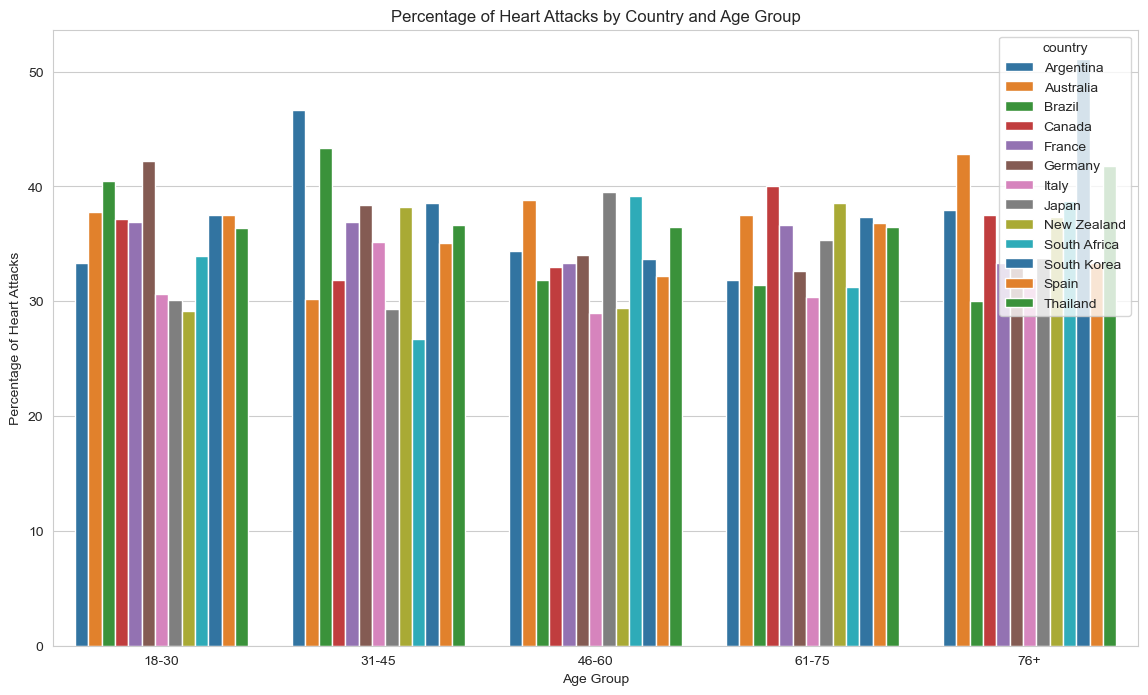

In [211]:
# Create a bar plot using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='age_group', y='Heart_Attack_Percentage', hue='country', data=merged_df, palette='tab10')

plt.xlabel('Age Group')
plt.ylabel('Percentage of Heart Attacks')
plt.title('Percentage of Heart Attacks by Country and Age Group')
plt.show()

In [215]:
df_heart_wlb_final.columns

Index(['age', 'sex', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week',
       'diet', 'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day', 'country',
       'heart_attack_risk', 'remote_jobs', 'overworked_population',
       'minimum_vacations_offered_(days)', 'vacations_taken_(days)',
       'unemployment', 'multiple_jobholders', 'inflation',
       'paid_parental_leave_(days)', 'covid_impact', 'covid_support',
       'healthcare', 'access_to_mental_healthcare', 'inclusivity_&_tolerance',
       'affordability', 'happiness,_culture_&_leisure', 'city_safety',
       'outdoor_spaces', 'air_quality', 'wellness_and_fitness', 'total_score',
       'age_group'],
      dtype='object')

alchol_consuption_heart_attack

In [231]:
# Calculate the total number of people by country and alcohol consumption level
total_counts = df_heart_wlb_final.groupby(['country', 'alcohol_consumption']).size().reset_index(name='Total_Count')


In [217]:
# Calculate the number of heart attacks by country and alcohol consumption level
heart_attack_counts = df_heart_wlb_final[df_heart_wlb_final['heart_attack_risk'] == 1].groupby(['country', 'alcohol_consumption']).size().reset_index(name='Heart_Attack_Count')


In [218]:
# Merge the two dataframes
merged_df = pd.merge(total_counts, heart_attack_counts, on=['country', 'alcohol_consumption'], how='left')
merged_df['Heart_Attack_Count'].fillna(0, inplace=True)

In [219]:
# Calculate the percentage of heart attacks
merged_df['Heart_Attack_Percentage'] = (merged_df['Heart_Attack_Count'] / merged_df['Total_Count']) * 100


/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

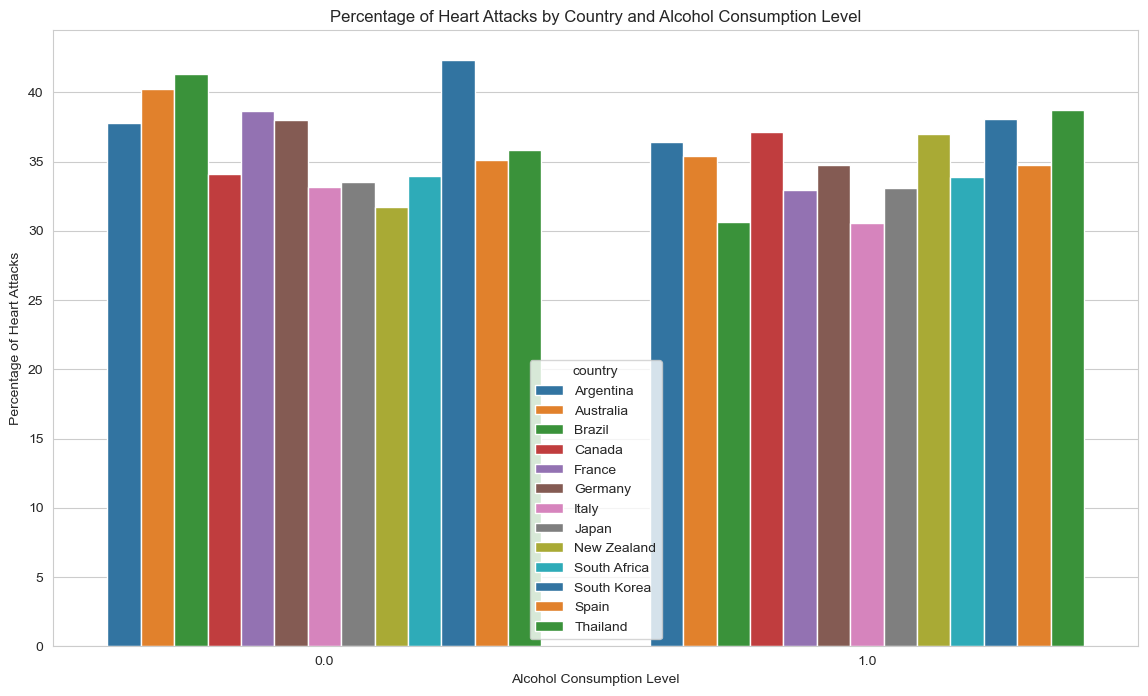

In [225]:
# Create a bar plot using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='alcohol_consumption', y='Heart_Attack_Percentage', hue='country', data=merged_df, palette='tab10')

plt.xlabel('Alcohol Consumption Level')
plt.ylabel('Percentage of Heart Attacks')
plt.title('Percentage of Heart Attacks by Country and Alcohol Consumption Level')
plt.show()

In [232]:
wlb.columns

Index(['2022', '2021', 'city', 'country', 'remote_jobs',
       'overworked_population', 'minimum_vacations_offered_(days)',
       'vacations_taken_(days)', 'unemployment', 'multiple_jobholders',
       'inflation', 'paid_parental_leave_(days)', 'covid_impact',
       'covid_support', 'healthcare', 'access_to_mental_healthcare',
       'inclusivity_&_tolerance', 'affordability',
       'happiness,_culture_&_leisure', 'city_safety', 'outdoor_spaces',
       'air_quality', 'wellness_and_fitness', 'total_score'],
      dtype='object')

In [234]:
wlb['country']

0           Norway
1      Switzerland
2          Finland
3      Switzerland
4          Denmark
          ...     
95        Thailand
96          Brazil
97        Malaysia
98             UAE
99    South Africa
Name: country, Length: 100, dtype: object